By: Nish Sule, Bryan Tamsir, Yue Yu, Xianyuan Zhou, Xin Zou

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [3]:
data = pd.concat(map(pd.read_csv, ['hmda14a.csv', 'hmda14b.csv','hmda14c.csv']))

In [4]:
df=data.sample(frac=0.4, replace=True, random_state=1)

In [123]:
shape(df)

(4750186, 53)

In [12]:
pd.options.display.max_columns = 999

In [13]:
df.replace('\\N',np.nan,inplace=True)

In [14]:
df.columns.tolist()

['YEAR',
 'RESP_ID',
 'AGENCY',
 'LOAN_TYPE',
 'PROP_TYPE',
 'PURPOSE',
 'OCCUPANCY',
 'AMNT',
 'PRE_APP',
 'ACTION',
 'MA',
 'STATE',
 'COUNTY',
 'TRACT',
 'APP_ETH',
 'COAPP_ETH',
 'APP_RACE1',
 'APP_RACE2',
 'APP_RACE3',
 'APP_RACE4',
 'APP_RACE5',
 'COAP_RACE1',
 'COAP_RACE2',
 'COAP_RACE3',
 'COAP_RACE4',
 'COAP_RACE5',
 'APP_SEX',
 'COAP_SEX',
 'APP_INCCH',
 'APP_INC',
 'PURCHTYPE',
 'DENIAL1',
 'DENIAL2',
 'DENIAL3',
 'SPREADCH',
 'SPREAD',
 'HOEPA',
 'LIENSTATUS',
 'EDITSTATUS',
 'SEQNO',
 'POPCH',
 'POP',
 'MINPOPCH',
 'MINPOP',
 'MED_INCCH',
 'MED_INC',
 'TCT2MSACH',
 'TCT2MSA',
 'OWNOCCCH',
 'OWNOCC',
 'OWNOCC4CH',
 'OWNOCC4',
 'APP_FLAG']

In [15]:
df1=df[[
 'LOAN_TYPE',
 'PROP_TYPE',
 'PURPOSE',
 'OCCUPANCY',
 'AMNT',
 'PRE_APP',
 'ACTION',
 'STATE',
 'APP_ETH',
 'COAPP_ETH',
 'APP_RACE1',
 'COAP_RACE1',
 'APP_SEX',
 'COAP_SEX',
 'APP_INC',
 'PURCHTYPE',
 'HOEPA',
 'LIENSTATUS',
 'POP',
 'MINPOP',
 'MED_INC',
 'TCT2MSA',
 'OWNOCC',
 'OWNOCC4',
 'APP_FLAG']]

In [16]:
df1.isna().sum()

LOAN_TYPE          0
PROP_TYPE          0
PURPOSE            0
OCCUPANCY          0
AMNT               0
PRE_APP            0
ACTION             0
STATE         106080
APP_ETH            0
COAPP_ETH          0
APP_RACE1          0
COAP_RACE1         0
APP_SEX            0
COAP_SEX           0
APP_INC       660238
PURCHTYPE          0
HOEPA              0
LIENSTATUS         0
POP           145455
MINPOP        145479
MED_INC       145247
TCT2MSA       145945
OWNOCC        146343
OWNOCC4       146170
APP_FLAG           0
dtype: int64

In [17]:
df2=df1[~(df1.STATE.isna()|df1.APP_INC.isna()|df1.POP.isna()|df1.MINPOP.isna()|df1.MED_INC.isna()|df1.TCT2MSA.isna()|
     df1.OWNOCC.isna()|df1.OWNOCC4.isna())]

In [18]:
df2.isna().sum()

LOAN_TYPE     0
PROP_TYPE     0
PURPOSE       0
OCCUPANCY     0
AMNT          0
PRE_APP       0
ACTION        0
STATE         0
APP_ETH       0
COAPP_ETH     0
APP_RACE1     0
COAP_RACE1    0
APP_SEX       0
COAP_SEX      0
APP_INC       0
PURCHTYPE     0
HOEPA         0
LIENSTATUS    0
POP           0
MINPOP        0
MED_INC       0
TCT2MSA       0
OWNOCC        0
OWNOCC4       0
APP_FLAG      0
dtype: int64

In [19]:
df2.columns=['LOAN_TYPE_T',
 'PROP_TYPE_T',
 'PURPOSE_T',
 'OCCUPANCY_T',
 'AMNT_N',
 'PRE_APP_T',
 'ACTION_T',
 'STATE_T',
 'APP_ETH_T',
 'COAPP_ETH_T',
 'APP_RACE1_T',
 'COAP_RACE1_T',
 'APP_SEX_T',
 'COAP_SEX_T',
 'APP_INC_N',
 'PURCHTYPE_T',
 'HOEPA_T',
 'LIENSTATUS_T',
 'POP_N',
 'MINPOP_N',
 'MED_INC_N',
 'TCT2MSA_N',
 'OWNOCC_N',
 'OWNOCC4_N',
 'APP_FLAG_T']

In [20]:
df2.head(1)

,LOAN_TYPE_T,PROP_TYPE_T,PURPOSE_T,OCCUPANCY_T,AMNT_N,PRE_APP_T,ACTION_T,STATE_T,APP_ETH_T,COAPP_ETH_T,APP_RACE1_T,COAP_RACE1_T,APP_SEX_T,COAP_SEX_T,APP_INC_N,PURCHTYPE_T,HOEPA_T,LIENSTATUS_T,POP_N,MINPOP_N,MED_INC_N,TCT2MSA_N,OWNOCC_N,OWNOCC4_N,APP_FLAG_T
514026,4,1,1,1,84,2,1,18.0,2,5,5,8,1,5,47,6,2,1,3717,2.18,59200,111.77,1299,1462,0


In [21]:
text_columns=[]
for i in df2.columns:
    if "_T" in str(i):
        text_columns.append(i)

In [22]:
text_columns

['LOAN_TYPE_T',
 'PROP_TYPE_T',
 'PURPOSE_T',
 'OCCUPANCY_T',
 'PRE_APP_T',
 'ACTION_T',
 'STATE_T',
 'APP_ETH_T',
 'COAPP_ETH_T',
 'APP_RACE1_T',
 'COAP_RACE1_T',
 'APP_SEX_T',
 'COAP_SEX_T',
 'PURCHTYPE_T',
 'HOEPA_T',
 'LIENSTATUS_T',
 'APP_FLAG_T']

In [23]:
number_columns=[]
for i in df2.columns:
    if "_N" in str(i):
        number_columns.append(i)

In [24]:
number_columns

['AMNT_N',
 'APP_INC_N',
 'POP_N',
 'MINPOP_N',
 'MED_INC_N',
 'TCT2MSA_N',
 'OWNOCC_N',
 'OWNOCC4_N']

### Not_applicable: OOCCUPANCY(3), APP_ETH(3,4), COAPP_ETH(3,4,5),APP_RACE1_T(6,7), APP_SEX(4), LIENSTATUS(4)

In [25]:
df3=df2[~((df2.OCCUPANCY_T==3)|(df2.APP_ETH_T==3)|(df2.APP_ETH_T==4)|(df2.COAPP_ETH_T==3)|(df2.COAPP_ETH_T==4)|(df2.COAPP_ETH_T==5)|
(df2.APP_RACE1_T==6)|(df2.APP_RACE1_T==7)|(df2.APP_SEX_T==3)|(df2.APP_SEX_T==4)|(df2.LIENSTATUS_T==4))]

In [26]:
len(df3)

1431739

In [27]:
df3.ACTION_T.value_counts()

1    953682
3    234621
4    144788
2     54679
5     43860
7        85
8        24
Name: ACTION_T, dtype: int64

### ACTION_T-- 1,3,7

In [28]:
ready=df3[(df3.ACTION_T==1)|(df3.ACTION_T==3)|(df3.ACTION_T==7)]

In [29]:
ready['ACTION_T']=(ready.ACTION_T==1)*1

In [30]:
ready.APP_RACE1_T.value_counts()

5    1058180
2      67013
3      49381
1       8341
4       5473
Name: APP_RACE1_T, dtype: int64

### Reset the index

In [31]:
ready=ready.reset_index()

In [32]:
ready.drop(columns='index',inplace=True)

In [33]:
ready.ACTION_T.value_counts()

1    953682
0    234706
Name: ACTION_T, dtype: int64

In [34]:
len(ready)

1188388

In [35]:
len(ready.index.unique())

1188388

In [36]:
for i in text_columns:
    print(str(i)+":  "+str(ready[i].nunique()))

LOAN_TYPE_T:  4
PROP_TYPE_T:  2
PURPOSE_T:  3
OCCUPANCY_T:  2
PRE_APP_T:  3
ACTION_T:  2
STATE_T:  52
APP_ETH_T:  2
COAPP_ETH_T:  2
APP_RACE1_T:  5
COAP_RACE1_T:  6
APP_SEX_T:  2
COAP_SEX_T:  4
PURCHTYPE_T:  10
HOEPA_T:  2
LIENSTATUS_T:  3
APP_FLAG_T:  2


In [37]:
one_zero_list=[]
for i in text_columns:
    if ready[i].nunique()==2:
        one_zero_list.append(i)

In [38]:
muilt_list=[]
for i in text_columns:
    if i not in one_zero_list:
        muilt_list.append(i)

In [39]:
one_zero_list.remove('ACTION_T')

### Set minor group to 1 and major group to 0

In [40]:
minor_group=[]
for i in one_zero_list:
    minor_group.append(str(i)+' minor group:'+str(ready[i].value_counts().nsmallest().index[0]))

In [41]:
minor_group

['PROP_TYPE_T minor group:2',
 'OCCUPANCY_T minor group:2',
 'APP_ETH_T minor group:1',
 'COAPP_ETH_T minor group:1',
 'APP_SEX_T minor group:2',
 'HOEPA_T minor group:1',
 'APP_FLAG_T minor group:1']

In [42]:
for col in one_zero_list:
    ready[col]=(ready[col]==(ready[col].value_counts().nsmallest().index[0]))*1

### Only 'go' has all dummies

In [43]:
go=pd.get_dummies(ready, columns=muilt_list)

In [44]:
from themis_ml import datasets
from themis_ml.datasets.german_credit_data_map import \
    preprocess_german_credit_data
from themis_ml.metrics import mean_difference, normalized_mean_difference, \
    mean_confidence_interval

• y (array-like) – shape (n, ) containing binary target variable, where 1 is the desireable
outcome and 0 is the undesireable outcome.

• s (array-like) – shape (n, ) containing binary protected class variable where 0 is the
advantaged group and 1 is the disadvantaged group.

In [45]:
y=go.ACTION_T

In [46]:
s_gender=go.APP_SEX_T  #Female=1    men>female

In [47]:
def report_metric(metric, mean_diff, lower, upper):
    print("{metric}: {md:0.02f} - 95% CI [{lower:0.02f}, {upper:0.02f}]"
          .format(metric=metric, md=mean_diff, lower=lower, upper=upper))

report_metric(
    "mean difference",
    *map(lambda x: x * 100, mean_difference(y,s_gender)))
report_metric(
    "normalized mean difference",
    *map(lambda x: x * 100, normalized_mean_difference(y,s_gender)))

mean difference: 5.49 - 95% CI [5.31, 5.68]
normalized mean difference: 5.56 - 95% CI [5.37, 5.74]


In [48]:
ready.APP_RACE1_T.value_counts()
#1 -- American Indian or Alaska Native
#2 -- Asian
#3 -- Black or African American
#4 -- Native Hawaiian or Other Pacific Islander
#5 -- White

5    1058180
2      67013
3      49381
1       8341
4       5473
Name: APP_RACE1_T, dtype: int64

In [49]:
s_RACE_white=go.APP_RACE1_T_5 #other< female

In [50]:
def report_metric(metric, mean_diff, lower, upper):
    print("{metric}: {md:0.02f} - 95% CI [{lower:0.02f}, {upper:0.02f}]"
          .format(metric=metric, md=mean_diff, lower=lower, upper=upper))

report_metric(
    "mean difference",
    *map(lambda x: x * 100, mean_difference(y,s_RACE_white)))
report_metric(
    "normalized mean difference",
    *map(lambda x: x * 100, normalized_mean_difference(y,s_RACE_white)))

mean difference: -8.52 - 95% CI [-8.75, -8.29]
normalized mean difference: -38.41 - 95% CI [-38.64, -38.18]


In [51]:
s_RACE_asian=go.APP_RACE1_T_2 #Other< Asian

In [52]:
def report_metric(metric, mean_diff, lower, upper):
    print("{metric}: {md:0.02f} - 95% CI [{lower:0.02f}, {upper:0.02f}]"
          .format(metric=metric, md=mean_diff, lower=lower, upper=upper))

report_metric(
    "mean difference",
    *map(lambda x: x * 100, mean_difference(y,s_RACE_asian)))
report_metric(
    "normalized mean difference",
    *map(lambda x: x * 100, normalized_mean_difference(y,s_RACE_asian)))

mean difference: -0.08 - 95% CI [-0.39, 0.23]
normalized mean difference: -0.10 - 95% CI [-0.41, 0.21]


In [53]:
s_RACE_afa=go.APP_RACE1_T_3 #Other>AFA

In [54]:
def report_metric(metric, mean_diff, lower, upper):
    print("{metric}: {md:0.02f} - 95% CI [{lower:0.02f}, {upper:0.02f}]"
          .format(metric=metric, md=mean_diff, lower=lower, upper=upper))

report_metric(
    "mean difference",
    *map(lambda x: x * 100, mean_difference(y,s_RACE_afa)))
report_metric(
    "normalized mean difference",
    *map(lambda x: x * 100, normalized_mean_difference(y,s_RACE_afa)))

mean difference: 17.82 - 95% CI [17.46, 18.17]
normalized mean difference: 21.28 - 95% CI [20.92, 21.64]


In [55]:
s_RACE_nh=go.APP_RACE1_T_4 #Other>NH

In [56]:
def report_metric(metric, mean_diff, lower, upper):
    print("{metric}: {md:0.02f} - 95% CI [{lower:0.02f}, {upper:0.02f}]"
          .format(metric=metric, md=mean_diff, lower=lower, upper=upper))

report_metric(
    "mean difference",
    *map(lambda x: x * 100, mean_difference(y,s_RACE_nh)))
report_metric(
    "normalized mean difference",
    *map(lambda x: x * 100, normalized_mean_difference(y,s_RACE_nh)))

mean difference: 8.43 - 95% CI [7.37, 9.48]
normalized mean difference: 10.45 - 95% CI [9.40, 11.51]


In [57]:
s_RACE_ia=go.APP_RACE1_T_1

In [58]:
def report_metric(metric, mean_diff, lower, upper):
    print("{metric}: {md:0.02f} - 95% CI [{lower:0.02f}, {upper:0.02f}]"
          .format(metric=metric, md=mean_diff, lower=lower, upper=upper))

report_metric(
    "mean difference",
    *map(lambda x: x * 100, mean_difference(y,s_RACE_ia)))
report_metric(
    "normalized mean difference",
    *map(lambda x: x * 100, normalized_mean_difference(y,s_RACE_ia)))

mean difference: 12.54 - 95% CI [11.68, 13.40]
normalized mean difference: 15.52 - 95% CI [14.66, 16.37]


ETH:2  APP_SEX: 2 RACE: 5     20 combination

In [59]:
report_metric(
    "RACE_ia",
    *map(lambda x: x * 100, mean_difference(y,s_RACE_ia)))
report_metric(
    "RACE_asian",
    *map(lambda x: x * 100, mean_difference(y,s_RACE_asian)))
report_metric(
    "RACE_afa",
    *map(lambda x: x * 100, mean_difference(y,s_RACE_afa)))
report_metric(
    "RACE_nh",
    *map(lambda x: x * 100, mean_difference(y,s_RACE_nh)))
report_metric(
    "RACE_white",
    *map(lambda x: x * 100, mean_difference(y,s_RACE_white)))

RACE_ia: 12.54 - 95% CI [11.68, 13.40]
RACE_asian: -0.08 - 95% CI [-0.39, 0.23]
RACE_afa: 17.82 - 95% CI [17.46, 18.17]
RACE_nh: 8.43 - 95% CI [7.37, 9.48]
RACE_white: -8.52 - 95% CI [-8.75, -8.29]


In [60]:
race_new=((ready.APP_RACE1_T==1)|(ready.APP_RACE1_T==3)|(ready.APP_RACE1_T==4))*1

In [61]:
report_metric(
    "RACE_new",
    *map(lambda x: x * 100, mean_difference(y,race_new)))

RACE_new: 16.60 - 95% CI [16.28, 16.91]


# Training

In [62]:
import pandas as pd

%pylab inline
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import os
from ipypublish import nb_setup
%load_ext rpy2.ipython
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [63]:
Base=go

In [64]:
Base['APP_RACE1_T']=race_new

In [65]:
Base.drop(columns=['APP_RACE1_T_1','APP_RACE1_T_2','APP_RACE1_T_3','APP_RACE1_T_4','APP_RACE1_T_5'],inplace=True)

In [66]:
y=Base.ACTION_T

In [67]:
X=Base.drop(columns='ACTION_T')

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [69]:
cl= RandomForestClassifier(random_state=2)
cl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [70]:
y_clpred=cl.predict(X_test)

In [71]:
confusion_matrix(y_test, y_clpred)

array([[ 51487,  18918],
       [ 21672, 264440]])

In [72]:
accuracy_score(y_test, y_clpred)

0.8861484866079318

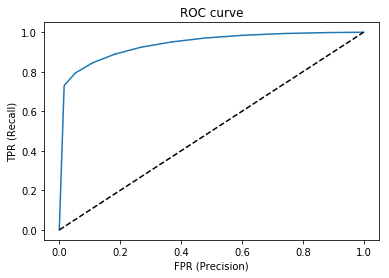

Area under curve (AUC):  0.9376410925417284


In [73]:
from sklearn.metrics import roc_curve, auc
y_score = cl.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [74]:
report_metric(
    "Base Mean",
    *map(lambda x: x * 100, mean_difference(y_clpred,X_test.APP_RACE1_T)))

Base Mean: 20.94 - 95% CI [20.35, 21.52]


In [75]:
Base.head()

,PROP_TYPE_T,OCCUPANCY_T,AMNT_N,ACTION_T,APP_ETH_T,COAPP_ETH_T,APP_SEX_T,APP_INC_N,HOEPA_T,POP_N,MINPOP_N,MED_INC_N,TCT2MSA_N,OWNOCC_N,OWNOCC4_N,APP_FLAG_T,LOAN_TYPE_T_1,LOAN_TYPE_T_2,LOAN_TYPE_T_3,LOAN_TYPE_T_4,PURPOSE_T_1,PURPOSE_T_2,PURPOSE_T_3,PRE_APP_T_1,PRE_APP_T_2,PRE_APP_T_3,STATE_T_1.0,STATE_T_2.0,STATE_T_4.0,STATE_T_5.0,STATE_T_6.0,STATE_T_8.0,STATE_T_9.0,STATE_T_10.0,STATE_T_11.0,STATE_T_12.0,STATE_T_13.0,STATE_T_15.0,STATE_T_16.0,STATE_T_17.0,STATE_T_18.0,STATE_T_19.0,STATE_T_20.0,STATE_T_21.0,STATE_T_22.0,STATE_T_23.0,STATE_T_24.0,STATE_T_25.0,STATE_T_26.0,STATE_T_27.0,STATE_T_28.0,STATE_T_29.0,STATE_T_30.0,STATE_T_31.0,STATE_T_32.0,STATE_T_33.0,STATE_T_34.0,STATE_T_35.0,STATE_T_36.0,STATE_T_37.0,STATE_T_38.0,STATE_T_39.0,STATE_T_40.0,STATE_T_41.0,STATE_T_42.0,STATE_T_44.0,STATE_T_45.0,STATE_T_46.0,STATE_T_47.0,STATE_T_48.0,STATE_T_49.0,STATE_T_50.0,STATE_T_51.0,STATE_T_53.0,STATE_T_54.0,STATE_T_55.0,STATE_T_56.0,STATE_T_72.0,COAP_RACE1_T_1,COAP_RACE1_T_2,COAP_RACE1_T_3,COAP_RACE1_T_4,COAP_RACE1_T_5,COAP_RACE1_T_6,COAP_SEX_T_1,COAP_SEX_T_2,COAP_SEX_T_3,COAP_SEX_T_4,PURCHTYPE_T_0,PURCHTYPE_T_1,PURCHTYPE_T_2,PURCHTYPE_T_3,PURCHTYPE_T_4,PURCHTYPE_T_5,PURCHTYPE_T_6,PURCHTYPE_T_7,PURCHTYPE_T_8,PURCHTYPE_T_9,LIENSTATUS_T_1,LIENSTATUS_T_2,LIENSTATUS_T_3,APP_RACE1_T
0,0,0,122,1,0,0,0,186,0,6776,11.41,85500,130.65,1851,2086,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,0,25,1,0,0,0,139,0,3871,12.68,95400,105.36,1209,1446,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,143,1,0,0,0,88,0,7115,12.06,63100,133.1,1997,2226,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,27,0,0,0,1,24,0,6114,1.67,54100,89.65,1803,3030,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,6,0,0,0,1,62,0,3390,5.81,62600,101.03,967,1056,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


# Base

In [76]:
N_SPLITS = 10
N_REPEATS = 5
RANDOM_STATE = 1000

def get_estimator_name(e):
    return "".join([x for x in str(type(e)).split(".")[-1]
                    if x.isalpha()])


def get_grid_params(grid_params_dict):
    """Get outer product of grid search parameters."""
    return [
        dict(params) for params in itertools.product(
            *[[(k, v_i) for v_i in v] for
              k, v in grid_params_dict.items()])]


def fit_with_s(estimator):
    has_relabeller = getattr(estimator, "relabeller", None) is not None
    child_estimator = getattr(estimator, "estimator", None)
    estimator_fit_with_s = getattr(estimator, "S_ON_FIT", False)
    child_estimator_fit_with_s = getattr(child_estimator, "S_ON_FIT", False)
    return has_relabeller or estimator_fit_with_s or\
        child_estimator_fit_with_s
    
    
def predict_with_s(estimator):
    estimator_pred_with_s = getattr(estimator, "S_ON_PREDICT", False)
    child_estimator = getattr(estimator, "estimator", None)
    return estimator_pred_with_s or \
        getattr(child_estimator, "S_ON_PREDICT", False)

def cross_validation_experiment(estimators, X, y, s, s_name, verbose=True):
    msg = "Training models: protected_class = %s" % s_name
    if verbose:
        print(msg)
        print("-" * len(msg))
    performance_scores = []
    # stratified groups tries to balance out y and s
    groups = [i + j for i, j in
              zip(y.astype(str), s_RACE.astype(str))]
    cv = RepeatedStratifiedKFold(
        n_splits=N_SPLITS,
        n_repeats=N_REPEATS,
        random_state=RANDOM_STATE)
    for e_name, e in estimators:
        if verbose:
            print("%s, fold:" % e_name),
        for i, (train, test) in enumerate(cv.split(X, y, groups=groups)):
            if verbose:
                print(i),
            # create train and validation fold partitions
            X_train, X_test = X[train], X[test]
            y_train, y_test = y[train], y[test]
            s_train, s_test = s[train], s[test]

            # fit model and generate train and test predictions
            if fit_with_s(e):
                e.fit(X_train, y_train, s_train)
            else:
                e.fit(X_train, y_train)
                
            train_pred_args = (X_train, s_train) if predict_with_s(e) \
                else (X_train, )
            test_pred_args = (X_test, s_test) if predict_with_s(e) \
                else (X_test, )
                
            train_pred_prob = e.predict_proba(*train_pred_args)[:, 1]
            train_pred = e.predict(*train_pred_args)
            test_pred_prob = e.predict_proba(*test_pred_args)[:, 1]
            test_pred = e.predict(*test_pred_args)

            # train scores
            performance_scores.append([
                s_name, e_name, i, "train",
                # regular metrics
                roc_auc_score(y_train, train_pred_prob),

                # fairness metrics
                mean_difference(train_pred, s_train)[0],
            ])
            # test scores
            performance_scores.append([
                s_name, e_name, i, "test",
                # regular metrics
                roc_auc_score(y_test, test_pred_prob),
                # fairness metrics
                mean_difference(test_pred, s_test)[0]
            ])
        if verbose:
            print("")
    if verbose:
        print("")
    return pd.DataFrame(
        performance_scores,
        columns=[
            "protected_class", "estimator", "cv_fold", "fold_type",
            "auc", "mean_diff"])


In [77]:
X = Base.drop(columns='ACTION_T').values
y = Base.ACTION_T.values
s_RACE = Base.APP_RACE1_T.values

In [78]:
LOGISTIC_REGRESSION = LogisticRegression(
    penalty="l2", C=0.001, class_weight="balanced")
DECISION_TREE_CLF = DecisionTreeClassifier(
    criterion="entropy", max_depth=10, min_samples_leaf=10, max_features=10,
    class_weight="balanced")
RANDOM_FOREST_CLF = RandomForestClassifier(
    criterion="entropy", n_estimators=50, max_depth=10, max_features=10,
    min_samples_leaf=10, class_weight="balanced")
estimators = [
    ("LogisticRegression", LOGISTIC_REGRESSION),
    ("DecisionTree", DECISION_TREE_CLF),
    ("RandomForest", RANDOM_FOREST_CLF)
]

In [79]:
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

In [80]:
experiment_baseline_RACE = cross_validation_experiment(
    estimators, X, y, s_RACE, "RACE")

Training models: protected_class = RACE
---------------------------------------
LogisticRegression, fold:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49

DecisionTree, fold:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49

RandomForest, fold:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49




In [81]:

import seaborn as sns
import matplotlib.pyplot as plt

UTILITY_METRICS = ["auc"]
FAIRNESS_METRICS = ["mean_diff"]

def summarize_experiment_results(experiment_df):
    return (
        experiment_df
        .drop("cv_fold", axis=1)
        .groupby(["protected_class", "estimator", "fold_type"])
        .mean())

experiment_baseline = pd.concat([
    experiment_baseline_RACE,
])
experiment_baseline_summary = summarize_experiment_results(
    experiment_baseline)
experiment_baseline_summary.query("fold_type == 'test'")

auc  mean_diff
protected_class estimator          fold_type                     
RACE            DecisionTree       test       0.873897   0.120635
                LogisticRegression test       0.914445   0.113336
                RandomForest       test       0.916160   0.092154

/Users/hayleychou/[/Users/hayleychou/anaconda3-1]/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/hayleychou/[/Users/hayleychou/anaconda3-1]/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


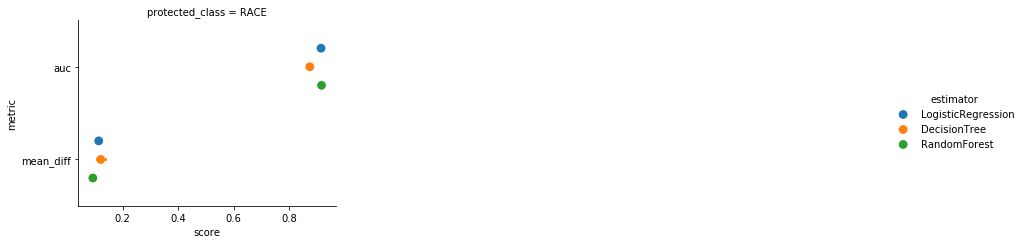

In [82]:
def plot_experiment_results(experiment_results):
    return (
        experiment_results
        .query("fold_type == 'test'")
        .drop(["fold_type", "cv_fold"], axis=1)
        .pipe(pd.melt, id_vars=["protected_class", "estimator"],
              var_name="metric", value_name="score")
        .pipe((sns.factorplot, "data"), y="metric",
              x="score", hue="estimator", col="protected_class", col_wrap=3,
              size=3.5, aspect=1.2, join=False, dodge=0.4))

plot_experiment_results(experiment_baseline);

In [83]:
X_no_RACE=Base.drop(columns=['APP_RACE1_T','ACTION_T']).values

# Relabelling

In [84]:
from sklearn.base import clone

from themis_ml.preprocessing.relabelling import Relabeller
from themis_ml.meta_estimators import FairnessAwareMetaEstimator

# here we use the relabeller class to create new y vectors for each of the
# protected class contexts.

# we also use the FairnessAwareMetaEstimator as a convenience class to
# compose together different fairness-aware methods. This wraps around the
# estimators that we defined in the previous
relabeller = Relabeller()
relabelling_estimators = [
    (name, FairnessAwareMetaEstimator(e, relabeller=relabeller))
    for name, e in estimators]

experiment_relabel_RACE = cross_validation_experiment(
    relabelling_estimators, X_no_RACE, y, s_RACE, "RACE")

Training models: protected_class = RACE
---------------------------------------
LogisticRegression, fold:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49

DecisionTree, fold:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49

RandomForest, fold:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49




In [85]:
experiment_relabel = pd.concat([
    experiment_relabel_RACE
])
experiment_relabel_summary = summarize_experiment_results(experiment_relabel)
experiment_relabel_summary.query("fold_type == 'test'")

auc  mean_diff
protected_class estimator          fold_type                     
RACE            DecisionTree       test       0.864154   0.086706
                LogisticRegression test       0.904157   0.083026
                RandomForest       test       0.910598   0.090852

# ROC

In [86]:

from themis_ml.postprocessing.reject_option_classification import \
    SingleROClassifier

# use the estimators defined above to define the linear additive
# counterfactually fair models
single_roc_clf_estimators = [
    (name, SingleROClassifier(estimator=e))
    for name, e in estimators]

experiment_single_roc_RACE = cross_validation_experiment(
    single_roc_clf_estimators, X_no_RACE, y, s_RACE, "RACE")

Training models: protected_class = RACE
---------------------------------------
LogisticRegression, fold:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49

DecisionTree, fold:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49

RandomForest, fold:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49




In [87]:
experiment_single_roc = pd.concat([
    experiment_single_roc_RACE
])
experiment_single_roc_summary = summarize_experiment_results(
    experiment_single_roc)
experiment_single_roc_summary.query("fold_type == 'test'")

auc  mean_diff
protected_class estimator          fold_type                     
RACE            DecisionTree       test       0.867434   0.123681
                LogisticRegression test       0.913556   0.143683
                RandomForest       test       0.915176   0.137736

# RPA

In [88]:
Base.columns.tolist()

['PROP_TYPE_T',
 'OCCUPANCY_T',
 'AMNT_N',
 'ACTION_T',
 'APP_ETH_T',
 'COAPP_ETH_T',
 'APP_SEX_T',
 'APP_INC_N',
 'HOEPA_T',
 'POP_N',
 'MINPOP_N',
 'MED_INC_N',
 'TCT2MSA_N',
 'OWNOCC_N',
 'OWNOCC4_N',
 'APP_FLAG_T',
 'LOAN_TYPE_T_1',
 'LOAN_TYPE_T_2',
 'LOAN_TYPE_T_3',
 'LOAN_TYPE_T_4',
 'PURPOSE_T_1',
 'PURPOSE_T_2',
 'PURPOSE_T_3',
 'PRE_APP_T_1',
 'PRE_APP_T_2',
 'PRE_APP_T_3',
 'STATE_T_1.0',
 'STATE_T_2.0',
 'STATE_T_4.0',
 'STATE_T_5.0',
 'STATE_T_6.0',
 'STATE_T_8.0',
 'STATE_T_9.0',
 'STATE_T_10.0',
 'STATE_T_11.0',
 'STATE_T_12.0',
 'STATE_T_13.0',
 'STATE_T_15.0',
 'STATE_T_16.0',
 'STATE_T_17.0',
 'STATE_T_18.0',
 'STATE_T_19.0',
 'STATE_T_20.0',
 'STATE_T_21.0',
 'STATE_T_22.0',
 'STATE_T_23.0',
 'STATE_T_24.0',
 'STATE_T_25.0',
 'STATE_T_26.0',
 'STATE_T_27.0',
 'STATE_T_28.0',
 'STATE_T_29.0',
 'STATE_T_30.0',
 'STATE_T_31.0',
 'STATE_T_32.0',
 'STATE_T_33.0',
 'STATE_T_34.0',
 'STATE_T_35.0',
 'STATE_T_36.0',
 'STATE_T_37.0',
 'STATE_T_38.0',
 'STATE_T_39.0',
 'STATE_

In [89]:
features = ['PROP_TYPE_T',
 'OCCUPANCY_T',
 'AMNT_N',
 'ACTION_T',
 'APP_ETH_T',
 'COAPP_ETH_T',
 'APP_SEX_T',
 'APP_INC_N',
 'HOEPA_T',
 'POP_N',
 'MINPOP_N',
 'MED_INC_N',
 'TCT2MSA_N',
 'OWNOCC_N',
 'OWNOCC4_N',
 'APP_FLAG_T',
 'LOAN_TYPE_T_1',
 'LOAN_TYPE_T_2',
 'LOAN_TYPE_T_3',
 'LOAN_TYPE_T_4',
 'PURPOSE_T_1',
 'PURPOSE_T_2',
 'PURPOSE_T_3',
 'PRE_APP_T_1',
 'PRE_APP_T_2',
 'PRE_APP_T_3',
 'STATE_T_1.0',
 'STATE_T_2.0',
 'STATE_T_4.0',
 'STATE_T_5.0',
 'STATE_T_6.0',
 'STATE_T_8.0',
 'STATE_T_9.0',
 'STATE_T_10.0',
 'STATE_T_11.0',
 'STATE_T_12.0',
 'STATE_T_13.0',
 'STATE_T_15.0',
 'STATE_T_16.0',
 'STATE_T_17.0',
 'STATE_T_18.0',
 'STATE_T_19.0',
 'STATE_T_20.0',
 'STATE_T_21.0',
 'STATE_T_22.0',
 'STATE_T_23.0',
 'STATE_T_24.0',
 'STATE_T_25.0',
 'STATE_T_26.0',
 'STATE_T_27.0',
 'STATE_T_28.0',
 'STATE_T_29.0',
 'STATE_T_30.0',
 'STATE_T_31.0',
 'STATE_T_32.0',
 'STATE_T_33.0',
 'STATE_T_34.0',
 'STATE_T_35.0',
 'STATE_T_36.0',
 'STATE_T_37.0',
 'STATE_T_38.0',
 'STATE_T_39.0',
 'STATE_T_40.0',
 'STATE_T_41.0',
 'STATE_T_42.0',
 'STATE_T_44.0',
 'STATE_T_45.0',
 'STATE_T_46.0',
 'STATE_T_47.0',
 'STATE_T_48.0',
 'STATE_T_49.0',
 'STATE_T_50.0',
 'STATE_T_51.0',
 'STATE_T_53.0',
 'STATE_T_54.0',
 'STATE_T_55.0',
 'STATE_T_56.0',
 'STATE_T_72.0',
 'COAP_RACE1_T_1',
 'COAP_RACE1_T_2',
 'COAP_RACE1_T_3',
 'COAP_RACE1_T_4',
 'COAP_RACE1_T_5',
 'COAP_RACE1_T_6',
 'COAP_SEX_T_1',
 'COAP_SEX_T_2',
 'COAP_SEX_T_3',
 'COAP_SEX_T_4',
 'PURCHTYPE_T_0',
 'PURCHTYPE_T_1',
 'PURCHTYPE_T_2',
 'PURCHTYPE_T_3',
 'PURCHTYPE_T_4',
 'PURCHTYPE_T_5',
 'PURCHTYPE_T_6',
 'PURCHTYPE_T_7',
 'PURCHTYPE_T_8',
 'PURCHTYPE_T_9',
 'LIENSTATUS_T_1',
 'LIENSTATUS_T_2',
 'LIENSTATUS_T_3',
 'APP_RACE1_T']

In [90]:
# create feature sets that remove variables with protected class information Base.APP_RACE1_T.values
feature_set_no_protect = [f for f in features if f != "APP_RACE1_T"]

In [91]:
# If you run this code and got error, just re-copy the columsn tolist into features and run these codes again
X_no_race = Base[feature_set_no_protect].values

In [92]:
experiment_PRA_race = cross_validation_experiment(
    estimators, X_no_race, y, s_RACE, "RACE")

Training models: protected_class = RACE
---------------------------------------
LogisticRegression, fold:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49

DecisionTree, fold:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49

RandomForest, fold:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49




In [93]:
experiment_PRA_race = pd.concat([
    experiment_PRA_race
])
experiment_PRA_summary = summarize_experiment_results(
    experiment_PRA_race)
experiment_PRA_summary.query("fold_type == 'test'")

auc  mean_diff
protected_class estimator          fold_type                     
RACE            DecisionTree       test       0.963247   0.137647
                LogisticRegression test       1.000000   0.165976
                RandomForest       test       1.000000   0.165977

# Camparing results

In [94]:
compare_experiments = (
    pd.concat([
        experiment_baseline.assign(experiment="B"),
         experiment_PRA_race.assign(experiment="RPA"),
        experiment_relabel.assign(experiment="RTV"),
        experiment_single_roc.assign(experiment="ROC")
       
    ])
    .assign(
        protected_class=lambda df: df.protected_class.str.replace("_", " "),
    )
)
compare_experiments

,protected_class,estimator,cv_fold,fold_type,auc,mean_diff,experiment
0,RACE,LogisticRegression,0,train,0.914185,0.113166,B
1,RACE,LogisticRegression,0,test,0.913276,0.125888,B
2,RACE,LogisticRegression,1,train,0.914652,0.113342,B
3,RACE,LogisticRegression,1,test,0.914873,0.115845,B
4,RACE,LogisticRegression,2,train,0.914545,0.114144,B
5,RACE,LogisticRegression,2,test,0.914068,0.105607,B
6,RACE,LogisticRegression,3,train,0.914559,0.113670,B
7,RACE,LogisticRegression,3,test,0.916369,0.112857,B
8,RACE,LogisticRegression,4,train,0.914615,0.112189,B
9,RACE,LogisticRegression,4,test,0.913820,0.120596,B


In [95]:
result_test=compare_experiments[compare_experiments.fold_type=='test']

In [96]:
result_test

,protected_class,estimator,cv_fold,fold_type,auc,mean_diff,experiment
1,RACE,LogisticRegression,0,test,0.913276,0.125888,B
3,RACE,LogisticRegression,1,test,0.914873,0.115845,B
5,RACE,LogisticRegression,2,test,0.914068,0.105607,B
7,RACE,LogisticRegression,3,test,0.916369,0.112857,B
9,RACE,LogisticRegression,4,test,0.913820,0.120596,B
11,RACE,LogisticRegression,5,test,0.914349,0.106402,B
13,RACE,LogisticRegression,6,test,0.914457,0.125600,B
15,RACE,LogisticRegression,7,test,0.914411,0.117180,B
17,RACE,LogisticRegression,8,test,0.914315,0.097939,B
19,RACE,LogisticRegression,9,test,0.914265,0.106291,B


In [97]:
result_test.groupby(['estimator','experiment'])['auc','mean_diff'].mean()

auc  mean_diff
estimator          experiment                     
DecisionTree       B           0.873897   0.120635
                   ROC         0.867434   0.123681
                   RPA         0.963247   0.137647
                   RTV         0.864154   0.086706
LogisticRegression B           0.914445   0.113336
                   ROC         0.913556   0.143683
                   RPA         1.000000   0.165976
                   RTV         0.904157   0.083026
RandomForest       B           0.916160   0.092154
                   ROC         0.915176   0.137736
                   RPA         1.000000   0.165977
                   RTV         0.910598   0.090852

In [98]:
result=result_test.groupby(['estimator','experiment'])['auc','mean_diff'].mean().reset_index()

In [99]:
result

,estimator,experiment,auc,mean_diff
0,DecisionTree,B,0.873897,0.120635
1,DecisionTree,ROC,0.867434,0.123681
2,DecisionTree,RPA,0.963247,0.137647
3,DecisionTree,RTV,0.864154,0.086706
4,LogisticRegression,B,0.914445,0.113336
5,LogisticRegression,ROC,0.913556,0.143683
6,LogisticRegression,RPA,1.000000,0.165976
7,LogisticRegression,RTV,0.904157,0.083026
8,RandomForest,B,0.916160,0.092154
9,RandomForest,ROC,0.915176,0.137736


In [100]:
result.to_csv('result.csv')

In [129]:
result

,estimator,experiment,auc,mean_diff
0,DecisionTree,B,0.873897,0.120635
1,DecisionTree,ROC,0.867434,0.123681
2,DecisionTree,RPA,0.963247,0.137647
3,DecisionTree,RTV,0.864154,0.086706
4,LogisticRegression,B,0.914445,0.113336
5,LogisticRegression,ROC,0.913556,0.143683
6,LogisticRegression,RPA,1.000000,0.165976
7,LogisticRegression,RTV,0.904157,0.083026
8,RandomForest,B,0.916160,0.092154
9,RandomForest,ROC,0.915176,0.137736


/Users/hayleychou/[/Users/hayleychou/anaconda3-1]/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


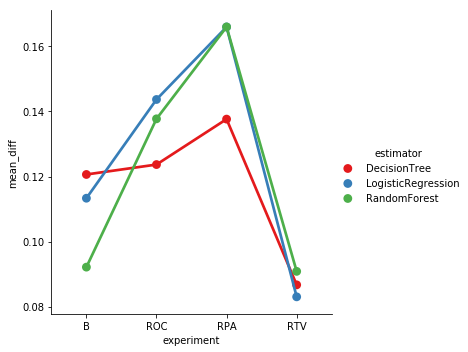

In [101]:
sns.factorplot(data=result, y='mean_diff', x='experiment',hue='estimator',palette="Set1")

/Users/hayleychou/[/Users/hayleychou/anaconda3-1]/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


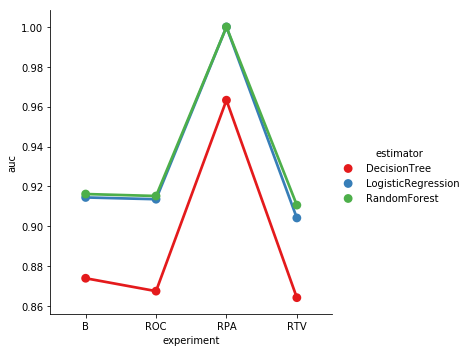

In [102]:
sns.factorplot(data=result, y='auc', x='experiment',hue='estimator',palette="Set1")

In [103]:
result_RTV=result_test[result_test.experiment=='RTV'].groupby('estimator')['auc','mean_diff'].mean().reset_index()

In [104]:
result_RTV

,estimator,auc,mean_diff
0,DecisionTree,0.864154,0.086706
1,LogisticRegression,0.904157,0.083026
2,RandomForest,0.910598,0.090852


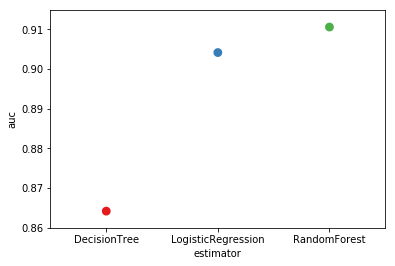

In [105]:
sns.pointplot(data=result_RTV, y='auc',x='estimator',palette="Set1",aspect=1)

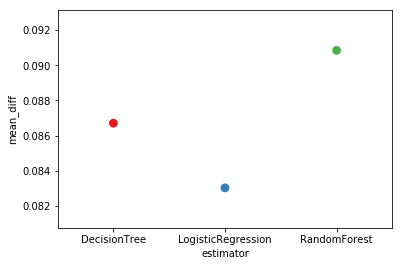

In [106]:
sns.pointplot(data=result_RTV, y='mean_diff',x='estimator',palette="Set1",aspect=1)

In [107]:
comparison_palette = sns.color_palette("Dark2", n_colors=2)

def compare_experiment_results_multiple_model(experiment_results):
    g = (
        experiment_results
        .query("fold_type == 'test'")
        .drop(["cv_fold"], axis=1)
        .pipe(pd.melt, id_vars=["experiment", "protected_class", "estimator",
                                "fold_type"],
              var_name="metric", value_name="score")
        .assign(
            metric=lambda df: df.metric.str.replace("_", " "))
        .pipe((sns.factorplot, "data"), y="experiment",
              x="score", hue="metric",
              col="protected_class", row="estimator",
              join=False, size=3, aspect=1.7, dodge=0.1,
              palette=comparison_palette, margin_titles=True, legend=False))
    g.set_axis_labels("mean score (95% CI)")
    for ax in g.axes.ravel():
        ax.set_ylabel("")
        plt.setp(ax.texts, text="")
    g.set_titles(row_template="{row_name}", col_template="{col_name}")
    plt.legend(title="metric", loc=9, bbox_to_anchor=(-0.65, -0.4))
    g.fig.legend(loc=9, bbox_to_anchor=(0.5, -0.3))
    g.fig.tight_layout();


/Users/hayleychou/[/Users/hayleychou/anaconda3-1]/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/hayleychou/[/Users/hayleychou/anaconda3-1]/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


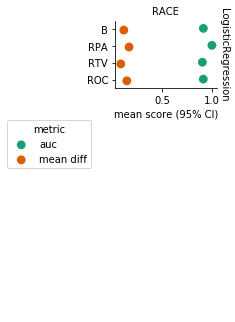

In [108]:
compare_experiment_results_multiple_model(
    compare_experiments.query("estimator == 'LogisticRegression'"));

/Users/hayleychou/[/Users/hayleychou/anaconda3-1]/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/hayleychou/[/Users/hayleychou/anaconda3-1]/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


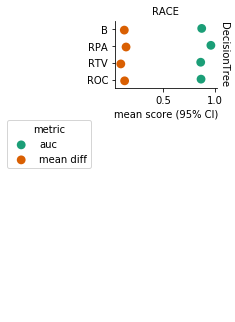

In [109]:
compare_experiment_results_multiple_model(
    compare_experiments.query("estimator == 'DecisionTree'"));

/Users/hayleychou/[/Users/hayleychou/anaconda3-1]/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/hayleychou/[/Users/hayleychou/anaconda3-1]/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


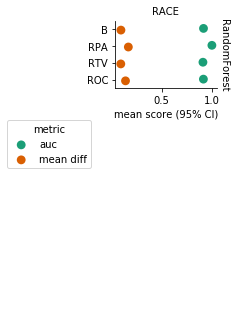

In [110]:
compare_experiment_results_multiple_model(
    compare_experiments.query("estimator == 'RandomForest'"));

In [111]:
from scipy import stats

def compute_corr_pearson(x, y, ci=0.95):
    corr = stats.pearsonr(x, y)
    z = np.arctanh(corr[0])
    sigma = (1 / ((len(x) - 3) ** 0.5))
    cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1 + ci ) / 2)
    return corr, np.tanh(cint)

/Users/hayleychou/[/Users/hayleychou/anaconda3-1]/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


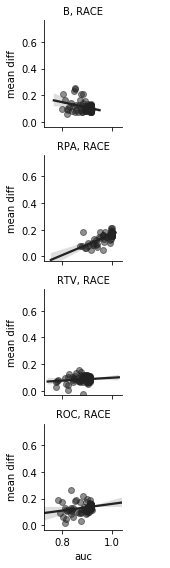

In [112]:
black_palette = sns.color_palette(["#222222"])

def plot_utility_fairness_tradeoff(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    sns_ax = sns.regplot(x=x, y=y, data=data, scatter_kws={'alpha':0.5},
                         **kwargs)
    (corr, p_val), ci = compute_corr_pearson(data[x], data[y])
    r_text = 'r = %0.02f (%0.02f, %0.02f)' % \
        (corr, ci[0], ci[1])
    sns_ax.annotate(
        r_text, xy=(0.7, 0),
        xytext=(0.07, 0.91),
        textcoords='axes fraction',
        fontweight="bold",
        fontsize=9,
        color="gray"
    )
    bottom_padding = 0.05
    top_padding = 0.5
    ylim = (data[y].min() - bottom_padding, data[y].max() + top_padding)
    sns_ax.set_ylim(*ylim)


g = sns.FacetGrid(
    (
        compare_experiments
        .drop("cv_fold", axis=1)
        .reset_index()
        .query("fold_type == 'test'")
        .rename(
            columns={"mean_diff": "mean diff"})
    ),
    col="protected_class",
    row="experiment",
    hue="experiment",
    size=2.0, aspect=1.3, sharey=True,
    palette=black_palette)
g.map_dataframe(plot_utility_fairness_tradeoff, "auc", "mean diff")
g.set_titles(template="{row_name}, {col_name}")
g.fig.tight_layout()
g.savefig("fairness_utility_tradeoff.png", dpi=500);

/Users/hayleychou/[/Users/hayleychou/anaconda3-1]/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


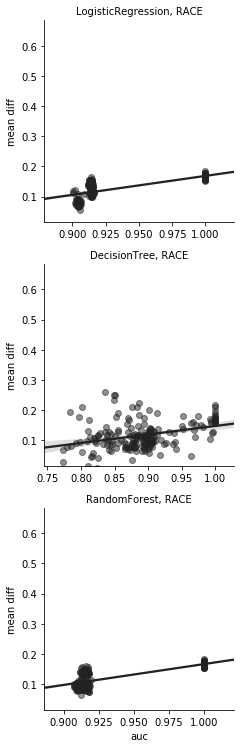

In [113]:
g = sns.FacetGrid(
    (
        compare_experiments
        .drop("cv_fold", axis=1)
        .reset_index()
        .query("fold_type == 'test'")
        .rename(
            columns={"mean_diff": "mean diff"})
    ),
    col="protected_class",
    row="estimator",
    hue="estimator",
    size=3.5, aspect=1,
    sharey=True, sharex=False,
    palette=black_palette)
g.map_dataframe(plot_utility_fairness_tradeoff, "auc", "mean diff")
g.set_titles(template="{row_name}, {col_name}")
g.fig.tight_layout()

---It is the end.---